# 10. Scaling a sequence
## 10.1 map()
**用途**：`map` 函数用于将指定函数应用于给定序列的每个元素。

**语法**：

```python
map(function, iterable, ...)
```

- `function`: 是一个函数，将应用于每个项上。
- `iterable`: 是一个或多个迭代对象。

In [25]:
def square(x):
    return x*x

numbers = [1, 2, 3, 4]
result = map(square, numbers)
print(list(result))  # 输出：[1, 4, 9, 16]

[1, 4, 9, 16]


如果提供了多个迭代对象，则函数应该接受与迭代对象数相同的参数：

In [26]:
def add(x, y):
    return x + y

numbers1 = [1, 2, 3]
numbers2 = [4, 5, 6]
result = map(add, numbers1, numbers2)
print(list(result))  # 输出：[5, 7, 9]

[5, 7, 9]


![image-20230928224306960](https://images.wu.engineer/images/2023/09/28/image-20230928224306960.png)

![image-20230928224147334](https://images.wu.engineer/images/2023/09/28/image-20230928224147334.png)

## 10.2 filter()

**用途**：`filter` 函数用于过滤序列，过滤掉不符合指定函数条件的元素。

**语法**：

```python
filter(function, iterable)
```

- `function`: 是一个函数，返回值应为布尔值，指示元素是否应保留在结果中。
- `iterable`: 是一个迭代对象。

In [27]:
def is_even(x):
    return x % 2 == 0

numbers = [1, 2, 3, 4, 5, 6]
result = filter(is_even, numbers)
print(list(result))  # 输出：[2, 4, 6]

[2, 4, 6]


![image-20230928224131716](https://images.wu.engineer/images/2023/09/28/image-20230928224131716.png)

### 注意

1. 在Python 3.x中，`map`和`filter`返回的都是迭代器，因此通常我们将它们转化为列表或元组来查看其内容。
   - 返回迭代器意味着如果从迭代器中取出数值，那么这个数值就会真正的从此迭代器中‘取出’，即不再存在于迭代器中，不能二次取出
2. `map`和`filter`都可以与匿名函数（`lambda` 函数）结合使用，使代码更简洁。例如：

In [28]:
numbers = [1, 2, 3, 4]
result = map(lambda x: x*x, numbers)
print(list(result))  # 输出：[1, 4, 9, 16]

result = filter(lambda x: x % 2 == 0, numbers)
print(list(result))  # 输出：[2, 4]

[1, 4, 9, 16]
[2, 4]


# 10 Counting a sequence
## 10.3 Shallowly counting

In [29]:
lst = [5,1,4,9,11,22,12,55]
lst2 = [1,2,3,[4,5,6,7]]
# Use len()
len(lst) # output: 8
len(lst2) # output: 4

# Implement by self
def ShallowlyCount(seq):
	if not seq:
		return 0
	return 1+ShallowlyCount(seq[1:])

In [30]:
ShallowlyCount(lst) # output: 8

8

In [31]:
ShallowlyCount(lst2) # output: 4

4

## 10.4 Deep counting

- In shallowly count, each item has constant length 1
- In deep count, the ‘length’ for each item may not be 1
  - `[1,2,3,4]`, each item has a count 1
  - `[[1,2],3,4]`, each item may not has a count 1
- How to tell the first item is a sequence or not?
- What to do if the first item is a sequence?

In [32]:
def DeepCount(seq):
	if seq == []:
		return 0
	elif type(seq) != list:
		return 1
	else:
		return DeepCount(seq[0]) + DeepCount(seq[1:])

In [33]:
DeepCount([[1,2,3,4],5,6,7,8])

8

In [34]:
DeepCount([[1,[2,3],4],[5],[[6,7]],8])

8

我们可以将deepcount转换为实用的其他函数，例如对一个list中的所有子元素（包含list中的list）平方，此为deepsquare函数

In [35]:
def deepSquare(seq):
    if seq == []:
        return seq
    elif type(seq) != list:
        return seq*seq
    else:
        return [deepSquare(seq[0])] + deepSquare(seq[1:])

为什么要返回一个 deepSquare(seq[0]) 的列表呢？

实际上，我们并没有直接返回一个 deepSquare(seq[0]) 的列表。我们递归地计算 seq[0]（可能是数字，也可能是子列表）的深度平方值，并将其放入一个新列表中，然后与 seq[1:] 的深度平方值合并。

In [36]:
deepSquare([[1,2,3,4],5,6,7,8])

[[1, 4, 9, 16], 25, 36, 49, 64]

## 10.5 DeepMap
即将先前提到的map函数转换为深度map函数，确保输入的list中的子元素和子元素的子元素都被相应的处理了

In [37]:
def deepMap(func, seq):
    if seq == []:
        return seq
    elif type(seq) != list:
        return func(seq)
    else:
        return [deepMap(func, seq[0])] + deepMap(func, seq[1:])

In [38]:
def square(value):
    return value ** 2
deepMap(square, [[1,2,3,4],5,6,7,8])

[[1, 4, 9, 16], 25, 36, 49, 64]

In [39]:
deepMap(lambda x:x/2, [[1,2,3,4],5,6,7,8])

[[0.5, 1.0, 1.5, 2.0], 2.5, 3.0, 3.5, 4.0]

## 10.6 Shallow copy

In [40]:
l = [[1,2,3,4],5,6,7,8]
l2 = l.copy()
l2

[[1, 2, 3, 4], 5, 6, 7, 8]

In [41]:
l2[0][0] = 999
l2

[[999, 2, 3, 4], 5, 6, 7, 8]

In [42]:
l

[[999, 2, 3, 4], 5, 6, 7, 8]

It is a shallow copy

## 10.7 Deep copy

In [43]:
l = [[1,2,3,4],5,6,7,8]
l2 = deepMap(lambda x:x.copy() if type(x)==list else x, l)
l2

[[1, 2, 3, 4], 5, 6, 7, 8]

In [44]:
l[0][0] = 999
l

[[999, 2, 3, 4], 5, 6, 7, 8]

In [45]:
l2

[[1, 2, 3, 4], 5, 6, 7, 8]

## 10.8 flatten()

Given a nested list, output a list with all the element but without any sub-lists

In [46]:
l = [[1,2,3,4],5,6,7,8]
def flatten(seq):
    if seq == []:
        return seq
    elif type(seq) != list:
        return [seq]
    else:
        return flatten(seq[0]) + flatten(seq[1:])
flatten(l)

[1, 2, 3, 4, 5, 6, 7, 8]

# 11. Multi-dimensional array

In [47]:
m = [[1,2], [3,4]]

In [55]:
print(m[0][0], m[0][1], m[1][0], m[1][1])

1 2 3 4


## 11.1 Create an N*N identical matrix

In [58]:
from pprint import pprint


def identityMatrix(N):
    output = []
    for i in range(N):
        row = []
        for j in range(N):
            row.append(1 if i==j else 0)
        output.append(row)
    return output

pprint(identityMatrix(10))

[[1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]]


![image-20230928232744887](https://images.wu.engineer/images/2023/09/28/image-20230928232744887.png)

## 11.2 Just want print 0 and 1

In [59]:
def mTightPrint(m):
    for i in range(len(m)):
        line = ''
        for j in range(len(m[0])):
            line += str(m[i][j])
        print(line)
m1 = identityMatrix(10)
mTightPrint(m1)

1000000000
0100000000
0010000000
0001000000
0000100000
0000010000
0000001000
0000000100
0000000010
0000000001


## 11.3 Create an R*C zero matrix

In [60]:
def createZeroMatrix(r,c):
    output = []
    for i in range(r):
        row = []
        for j in range(c):
            row.append(0)
        output.append(row)
    return output

m = createZeroMatrix(4, 9)
m

[[0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0]]

In [61]:
pprint(m)

[[0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0]]


## 11.4 Matrix addition

In [62]:
def sumMatrices(m1, m2): # Assuming m1 and m2 have same number of r and c
    r = len(m1)
    c = len(m1[0])
    output = createZeroMatrix(r,c)
    for i in range(r):
        for j in range(c):
            output[i][j] = m1[i][j] + m2[i][j]
    return output

# 12. OOP

### class:
使用class关键字定义一个类，后跟类名和冒号。类名通常采用驼峰命名法。
```python
class MyClass:
    pass
```
### instance:
- A particular object or entity of a given class
- A concrete, usable object created from the blueprint
类的对象或实例是根据类定义创建的实体。可以使用类名和括号来创建它，就像调用函数一样。
```python
obj = MyClass("Some value")
```

### attribute:
属性是与对象关联的变量。它们表示对象的状态或数据。

类中可以有两种类型的属性：实例属性和类属性。

实例属性：与特定的对象实例关联。每个对象实例都可以有其自己的值。

```python
class MyClass:
    def __init__(self, value):
        self.instance_attribute = value
```
类属性：与类自身关联，而不是实例。所有对象实例共享同一个类属性。

```python
class MyClass:
    class_attribute = "I'm a class attribute"
```
### method:
方法是与对象关联的函数，定义了对象可以执行的操作。
类的方法需要至少一个参数，通常命名为self，它引用对象实例本身。
```python
class MyClass:
    def my_method(self):
        print("This is a method!")
```

### 构造函数 __init__:

当创建类的新对象时，__init__ 方法会自动调用。它常用于初始化对象的属性。
```python
class MyClass:
    def __init__(self, value):
        self.attribute = value
```


In [69]:
class StudentRecord():
    # __init__ 函数类似于C++中的构造函数，当创建类的新对象时，构造函数会自动调用。
    def __init__(self):
        self.name = ''
        self.sn = ''
        self.gender = ''
        self.year = 0
        self.eng = 0
        self.math = 0
        self.sci = 0
        self.ss = 0

- In a student record, we want to store name, student number...
    - These are created automatically using the class above if a new object is created

In [70]:
alan = StudentRecord()
alan.name

''

## 12.1 Store values into an instance

In [71]:
alan.name = 'Alan'
alan.sn = 'A1000001A'
alan.gender = 'M'
alan.eng = 90
alan.math = 100
alan.sci = 80
alan.ss = 10

## 12.2 Initialization the object through constructor

In [72]:
class BankAccount():
    def __init__(self, name, balance):
        self.name = name
        self.balance = balance

In [77]:
myAcc = BankAccount('Alan', 1000)
johnAcc = BankAccount('John Wick', 100000000)

In [78]:
myAcc.name

'Alan'

In [79]:
myAcc.balance

1000

In [80]:
myAcc.balance += 999
myAcc.balance

1999

In [81]:
myAcc.balance -= 10000
myAcc.balance

-8001

## 12.3 Method

How to prevent the account balance below than 0?

In [82]:
class BankAccount():
    def __init__(self, name, balance):
        self.name = name
        self.balance = balance
    def withdraw(self, amount):
        if self.balance < amount:
            print(f"Money not enough! You do not have ${amount}")
            return 0
        else:
            self.balance -= amount
            return amount
    def showBalance(self):
        print(f'Your balance is ${self.balance}')

In [83]:
myAcc = BankAccount('Alan', 1000)
myAcc.showBalance()

Your balance is $1000


In [84]:
myAcc.withdraw(123)

123

In [85]:
myAcc.showBalance()

Your balance is $877


In [86]:
myAcc.withdraw(99999)

Money not enough! You do not have $99999


0

## 12.4 Inheritance

一个类可以继承另一个类的属性和方法，使代码重用变得简单。
```python
class ParentClass:
    pass

class ChildClass(ParentClass):
    pass
```


In [87]:
class Vehicle:
    def __init__(self, pos):
        self.pos = pos
        self.velocity = (0,0)
    def setVelocity(self, vx, vy):
        self.velocity = (vx, vy)
    def move(self):
        self.pos = (self.pos[0] + self.velocity[0], self.pos[1] + self.velocity[1])
        print(f"Move to {self.pos}")

class Sportscar(Vehicle):
    def turnOnTurbo(self):
        print("VROOOOOOM...")
        self.velocity = (self.velocity[0]*2, self.velocity[1]*2)
        print(f'Velocity increased to {self.velocity}')

### 12.4.1 Change the initialization of the inheritance

1. Overriding. Redefining the method will override the one in Vehicle
2. Calling super class. Redefine a constructor, but call the constructor in super() (Vehicle class) instead

In [88]:
class Lorry(Vehicle):
    # Overriding
    def __init__(self, pos):
        self.pos = pos
        self.velocity = (0,0)
        self.cargo = []

In [89]:
class Lorry(Vehicle):
    # Call super class
    def __init__(self, pos):
        super().__init__(pos)
        self.cargo = []

super() 函数在Python中用于调用父类（或超类）的方法。它常用于两种情况：覆盖类方法时，以及多重继承中。使用 super() 可以确保父类中的适当方法被调用，特别是在存在多个继承层次或多重继承的情况下。

为什么要使用 super()?
当你在子类中重写某个方法，但仍然希望调用父类中的原始版本时，super() 就派上用场了。最常见的情况是在子类的 __init__ 方法中，你可能希望扩展或修改父类的初始化行为，而不是完全替换它。

在条件允许的情况下，优先使用super函数而不是重载

## 12.5 Private methods

In [99]:
class test:
    def __init__(self):
        pass
    def __privateThings(self):
        print("private")
        pass

test_object = test()
test_object.__privateThings() # Add underscore to access the private method

private


# 13. Searching

## 13.1 Binary Search

1. Find the middle element
2. If it is we are looking for, return True
3. A) If our key is smaller than the middle element, repeat search on the left of the element
   B) Else, repeat search on the right of the element

In [102]:
def binary_search(key, seq):
    if seq == []:
        return False
    mid = len(seq) // 2
    if key == seq[mid]:
        return True
    elif key < seq[mid]:
        return binary_search(key, seq[:mid])
    else:
        return binary_search(key, seq[mid+1:])

In [103]:
def search(self, nums, target):
    left = 0
    right = len(nums) - 1
    while left<=right:
      # Declare a pointer in the middle of the array
      mid = (right + left) // 2
      if nums[mid] == target:
        return mid
      elif nums[mid] > target:
        right = mid - 1
      else:
        left = mid + 1

    return -1

## 13.2 Selection Sort
Selection sort（选择排序）是一种简单的比较排序算法。它的工作原理是将列表分为两部分：一部分是已经排序的，另一部分是未排序的。在每一次迭代中，它都从未排序的部分找到最小（或最大，取决于排序方向）的元素，并将其移到已排序部分的末尾。这个过程一直持续到整个列表都被排序。

算法步骤：
开始时，假设第一个元素是最小的。
遍历未排序的部分，找到最小的元素。
将找到的最小元素与第一个未排序的元素交换。
移动到下一个元素并重复以上过程，直到整个列表都已经排序。

In [105]:
a = [4,12,3,1,11]
sort = []
while a:
    smallest = a[0]
    for element in a:
        if element < smallest:
            smallest = element
    a.remove(smallest)
    sort.append(smallest)
    print(a)
sort

[4, 12, 3, 11]
[4, 12, 11]
[12, 11]
[12]
[]


[1, 3, 4, 11, 12]

## 13.3 Merge Sort

Merge sort（合并排序）是一种递归的分治排序算法，它将一个列表分成两个半部分，对每一部分进行排序，然后将结果合并以产生一个单一的排序列表。该算法是稳定的，这意味着相同值的元素将保持其在输入中的相对顺序。

算法步骤：
分解：如果列表中只有一个元素，则它已经是排序的。否则，将列表分成两个或更多的子列表。
解决：使用合并排序递归地排序每个子列表。
合并：将两个排序后的子列表合并为一个单一的排序列表

In [106]:
def merge(left, right):
    results = []
    while left and right:
        if left[0] < right[0]:
            results.append(left.pop(0))
        else:
            results.append(right.pop(0))
    results.extend(left)
    results.extend(right)
    return results

def merge_sort(lst):
    if len(lst) < 2:
        return lst
    mid = len(lst) // 2
    left = merge_sort(lst[:mid])
    right = merge_sort(lst[mid:])
    return merge(left, right)

# 14. Optimization

## Memoization

In [107]:
# Create a dictionary to remember the answer if fibm(n) is computed before
fibans = {}
def fibm(n):
    # If the answer was computed before, get the answer from the dict
    if n in fibans.keys():
        return fibans[n]
    if n==0:
        ans = 0
    elif n==1:
        ans = 1
    else:
        ans = fibm(n-1) + fibm(n-2)
    # Otherwise, compute the answer and put it into the dict
    fibans[n] = ans
    return ans

In [108]:
def fibi(n):
    ans = [0,1,1]
    if n<3:
        return ans[n]
    for i in range(3, n+1):
        ans.append(ans[i-1]+ans[i-2])
    return ans[n]

# 15. Exceptions

## 15.1 Rising exceptions

In [109]:
raise NameError('HiThere')

NameError: HiThere

In [110]:
def add_two(x, y):
    if not isinstance(x, int):
        raise TypeError('First argument must be of type integer')
    if not isinstance(y, int):
        raise TypeError('Second argument must be of type integer')
    return x+y

In [111]:
z = add_two('abc', 'def')

TypeError: First argument must be of type integer

In [112]:
def add_two(x, y):
    if not isinstance(x, (int, float)): # Check for multiple types
        raise TypeError('First argument must be of type integer')
    if not isinstance(y, (int, float)):
        raise TypeError('Second argument must be of type integer')
    return x+y

add_two(2.0,1)

3.0

## 15.2 Handling Exceptions

In [113]:
x, y = 5, 0
try:
    z = x/y
except ZeroDivisionError:
    print('divide by zero')

divide by zero


In [114]:
def devide_test(x, y):
    try:
        result = x / y
    except ZeroDivisionError:
        print('division by zero')
    else:
        print("result is", result)
    finally:
        print("executing finally clause")

In [115]:
devide_test(2,1)

result is 2.0
executing finally clause


In [116]:
devide_test(2,0)

division by zero
executing finally clause


# 16. Data Visualization

In [122]:
import numpy as np
import matplotlib.pyplot as plt

In [118]:
x = [i/100 for i in range(0, 314)] # 0, 0.01, 0.02, ... , 3.14

In [120]:
x1 = np.arange(0, 3.14, 0.1)
x1

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
       2.6, 2.7, 2.8, 2.9, 3. , 3.1])

In [121]:
len(x1)

32

<function matplotlib.pyplot.show(close=None, block=None)>

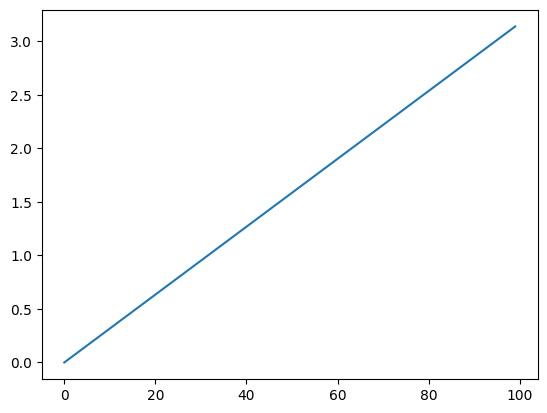

In [123]:
x1 = np.linspace(0,3.14,100)
plt.plot(x1)
plt.show

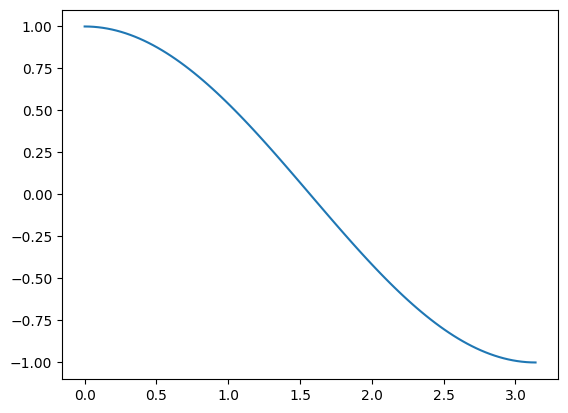

In [125]:
y1 = np.cos(x1)
plt.plot(x1, y1)
plt.show()